# analysis.ipynb
**Author:** Khoi Nguyen

**Date created:** 03/06/2023

**Last modified:** 04/15/2023

**Description:** This notebook analyzes and visualizes the data of the semantic scores which were obtained from semantically comparing datasets of sentences between datasets of the `ada`, `1k_ada`, `10k_ada`, `100k_ada`, and `Curie` models.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

### ada
Stats on `ada`

In [2]:
# Read in CSV
df = pd.read_csv('results/semantic_score_ada.csv')

In [3]:
# Calculate the mean, median, and mode of the semantic scores
mean = df['semantic_score'].mean()
median = df['semantic_score'].median()
mode = df['semantic_score'].mode()[0]

print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)

Mean: 0.7828073514215648
Median: 0.8125507533550262
Mode: 0.0124616809189319


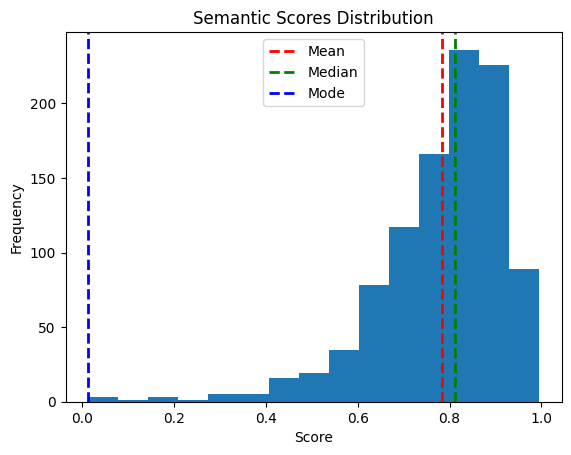

In [4]:
# Visualize the above statistics and the variance
plt.hist(df['semantic_score'], bins = 15)
plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median, color='g', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mode, color='b', linestyle='dashed', linewidth=2, label='Mode')
plt.title('Semantic Scores Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [5]:
# Calculate the percentage of sentences with a semantic score greater than 0.5
total_sentences = df.shape[0]
above_half_sentences = df[df['semantic_score'] > 0.5].shape[0]

percentage_above_half = (above_half_sentences / total_sentences) * 100

print("Percentage of sentences with a score greater than 0.5:", percentage_above_half)

Percentage of sentences with a score greater than 0.5: 96.0


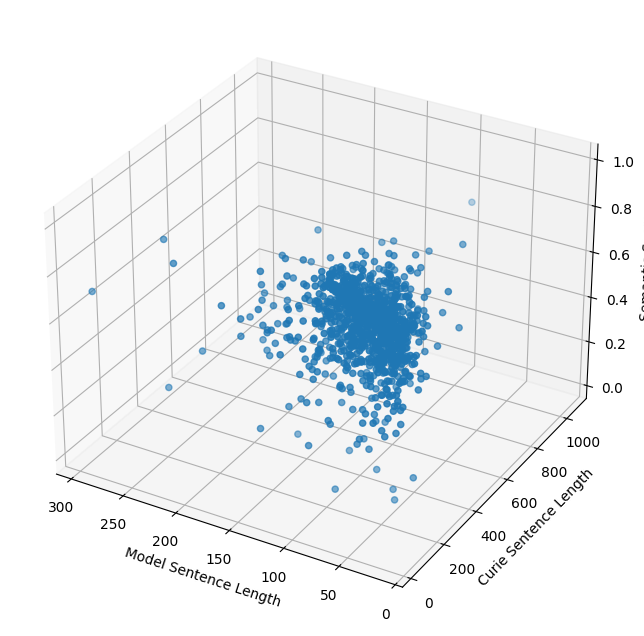

In [6]:
# Create 3D scatter plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['model_sentence'].str.len(), df['curie_sentence'].str.len(), df['semantic_score'])
ax.set_xlabel('Model Sentence Length')
ax.set_ylabel('Curie Sentence Length')
ax.set_zlabel('Semantic Score')
ax.invert_xaxis()
plt.show()

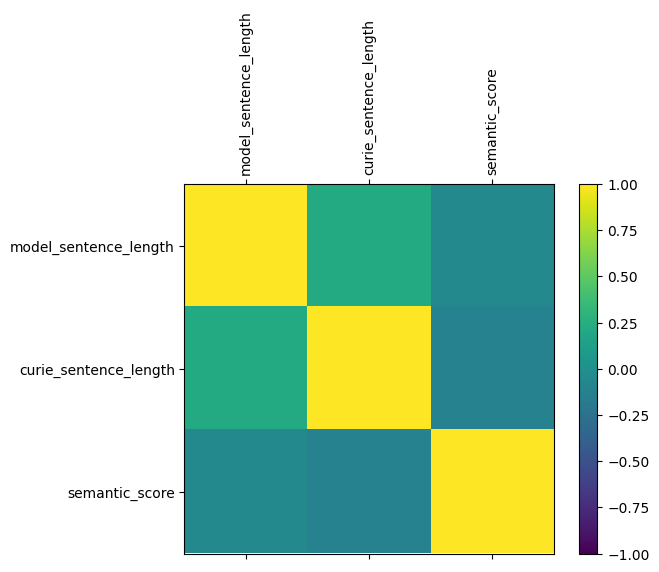

In [7]:
# Create new column for sentence length
df['model_sentence_length'] = df['model_sentence'].str.len()
df['curie_sentence_length'] = df['curie_sentence'].str.len()

# Calculate correlations
corr_matrix = df[['model_sentence_length', 'curie_sentence_length', 'semantic_score']].corr()

# Plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,3,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(['model_sentence_length', 'curie_sentence_length', 'semantic_score'], rotation=90)
ax.set_yticklabels(['model_sentence_length', 'curie_sentence_length', 'semantic_score'])
plt.show()

### 1k_ada
Stats on `1k_ada`

### 10k_ada
Stats on `10k_ada`

### 100k_ada
Stats on `100k_ada`

### Overall Stats
Stats on everything!